In [ ]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving Salary_Data (3).csv to Salary_Data (3).csv


In [ ]:
sal=pd.read_csv('Salary_Data (3).csv')
sal

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [ ]:
#eda
sal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
sal['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [ ]:
sal['Salary'].unique()

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


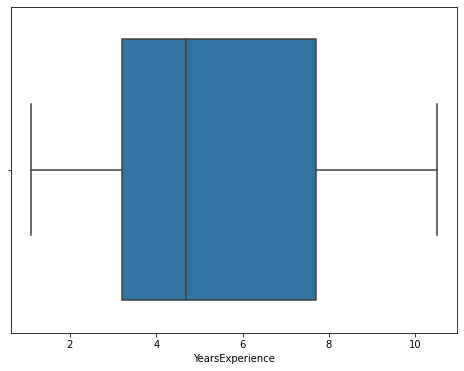

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


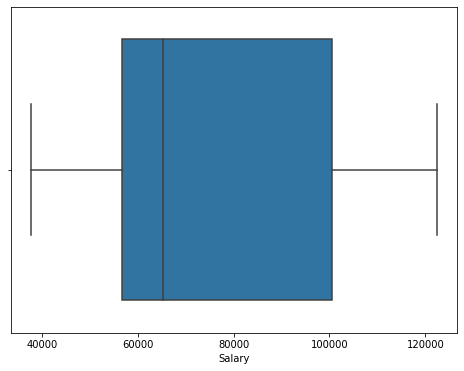

In [ ]:
# Checking for outliers with help of boxplot
plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.boxplot(sal.YearsExperience)
plt.show()

plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.boxplot(sal.Salary)
plt.show()

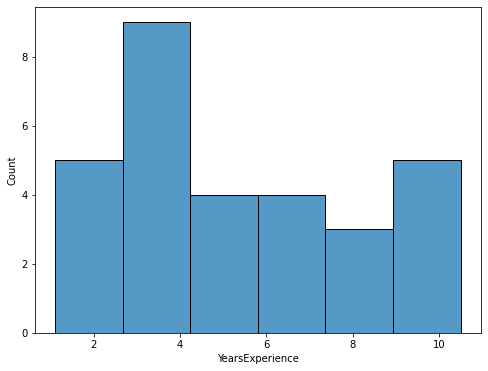

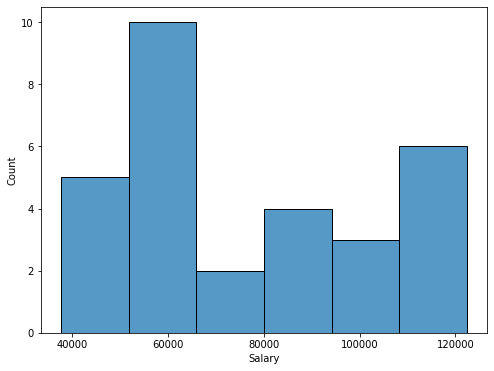

In [ ]:
plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.histplot(sal.YearsExperience)
plt.show()

plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.histplot(sal.Salary)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


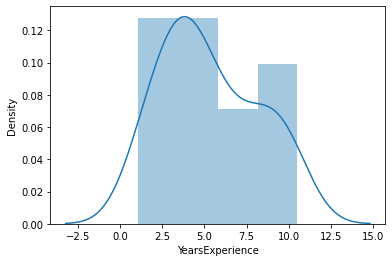

In [ ]:
sns.distplot(sal['YearsExperience'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


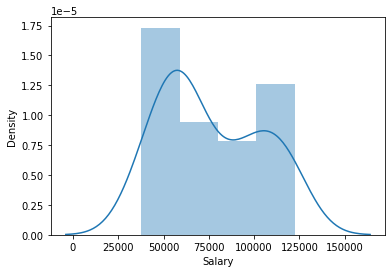

In [ ]:
sns.distplot(sal['Salary'])

In [ ]:
sal.rename({'YearsExperience':'yrs_experience','Salary':'salary_hike'},axis=1,inplace=True)

In [ ]:
#log transformations
log=np.log(sal.yrs_experience)
log


0     0.095310
1     0.262364
2     0.405465
3     0.693147
4     0.788457
5     1.064711
6     1.098612
7     1.163151
8     1.163151
9     1.308333
10    1.360977
11    1.386294
12    1.386294
13    1.410987
14    1.504077
15    1.589235
16    1.629241
17    1.667707
18    1.774952
19    1.791759
20    1.916923
21    1.960095
22    2.066863
23    2.104134
24    2.163323
25    2.197225
26    2.251292
27    2.261763
28    2.332144
29    2.351375
Name: yrs_experience, dtype: float64

In [ ]:
model1=smf.ols('salary_hike~log',data=sal).fit()
model1

In [ ]:
model1.params

Intercept    14927.97177
log          40581.98796
dtype: float64

In [ ]:
model1.pvalues

Intercept    7.268813e-03
log          3.250155e-13
dtype: float64

In [ ]:
model1.rsquared

0.853888882875697

In [ ]:
#square transformations
sq=np.square(sal.yrs_experience)
sq

0       1.21
1       1.69
2       2.25
3       4.00
4       4.84
5       8.41
6       9.00
7      10.24
8      10.24
9      13.69
10     15.21
11     16.00
12     16.00
13     16.81
14     20.25
15     24.01
16     26.01
17     28.09
18     34.81
19     36.00
20     46.24
21     50.41
22     62.41
23     67.24
24     75.69
25     81.00
26     90.25
27     92.16
28    106.09
29    110.25
Name: yrs_experience, dtype: float64

In [ ]:
model2=smf.ols('salary_hike~sq',data=sal).fit()
model2

In [ ]:
model2.params

Intercept    48042.585515
sq             776.318773
dtype: float64

In [ ]:
model2.pvalues

Intercept    3.389190e-19
sq           1.518127e-16
dtype: float64

In [ ]:
model2.rsquared

0.9153198857852564

In [ ]:
#square root transformations
sq1=np.sqrt(sal.yrs_experience)
sq1


0     1.048809
1     1.140175
2     1.224745
3     1.414214
4     1.483240
5     1.702939
6     1.732051
7     1.788854
8     1.788854
9     1.923538
10    1.974842
11    2.000000
12    2.000000
13    2.024846
14    2.121320
15    2.213594
16    2.258318
17    2.302173
18    2.428992
19    2.449490
20    2.607681
21    2.664583
22    2.810694
23    2.863564
24    2.949576
25    3.000000
26    3.082207
27    3.098387
28    3.209361
29    3.240370
Name: yrs_experience, dtype: float64

In [ ]:
#cuberoot transformation
cube=np.cbrt(sal.yrs_experience)
cube

0     1.032280
1     1.091393
2     1.144714
3     1.259921
4     1.300591
5     1.426043
6     1.442250
7     1.473613
8     1.473613
9     1.546680
10    1.574061
11    1.587401
12    1.587401
13    1.600521
14    1.650964
15    1.698499
16    1.721301
17    1.743513
18    1.806969
19    1.817121
20    1.894536
21    1.921997
22    1.991632
23    2.016530
24    2.056710
25    2.080084
26    2.117912
27    2.125317
28    2.175767
29    2.189760
Name: yrs_experience, dtype: float64

In [ ]:
model3=smf.ols('salary_hike~sq1',data=sal).fit()
model3

In [ ]:
model3.params

Intercept   -16055.769117
sq1          41500.680583
dtype: float64

In [ ]:
model3.pvalues

Intercept    2.906965e-03
sq1          8.565358e-18
dtype: float64

In [ ]:
model3.rsquared

0.9310009544993526

In [ ]:
model4=smf.ols('salary_hike~cube',data=sal).fit()
model4

In [ ]:
model4.params

Intercept   -57049.503555
cube         78964.327230
dtype: float64

In [ ]:
model4.pvalues

Intercept    9.043071e-08
cube         2.907409e-16
dtype: float64

In [ ]:
model4.rsquared

0.9113098800320786

In [ ]:
#correlation
sal.corr()

,yrs_experience,salary_hike
yrs_experience,1.000000,0.978242
salary_hike,0.978242,1.000000


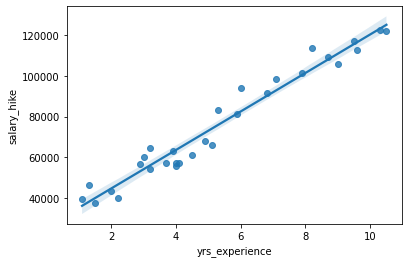

In [ ]:
sns.regplot(x='yrs_experience',y='salary_hike',data=sal)

In [ ]:
#creating model
model=smf.ols('salary_hike~yrs_experience',data=sal).fit()
model

In [ ]:
#testing the model
model.params


Intercept         25792.200199
yrs_experience     9449.962321
dtype: float64

In [ ]:
model.pvalues

Intercept         5.511950e-12
yrs_experience    1.143068e-20
dtype: float64

In [ ]:
model.rsquared

0.9569566641435086

In [ ]:
#model predictions
sal['predictions_sal_hike']=model.fittedvalues
sal

,yrs_experience,salary_hike,predictions_sal_hike
0,1.1,39343,36187.158752
1,1.3,46205,38077.151217
2,1.5,37731,39967.143681
3,2.0,43525,44692.124842
4,2.2,39891,46582.117306
5,2.9,56642,53197.090931
6,3.0,60150,54142.087163
7,3.2,54445,56032.079627
8,3.2,64445,56032.079627
9,3.7,57189,60757.060788
